# Importing the Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

# import dataset

In [2]:
heart_df = pd.read_csv('heartog.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Exploratory Data Analysis

In [4]:
heart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.shape

(1025, 14)

In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [9]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Plotting the distribution plot.

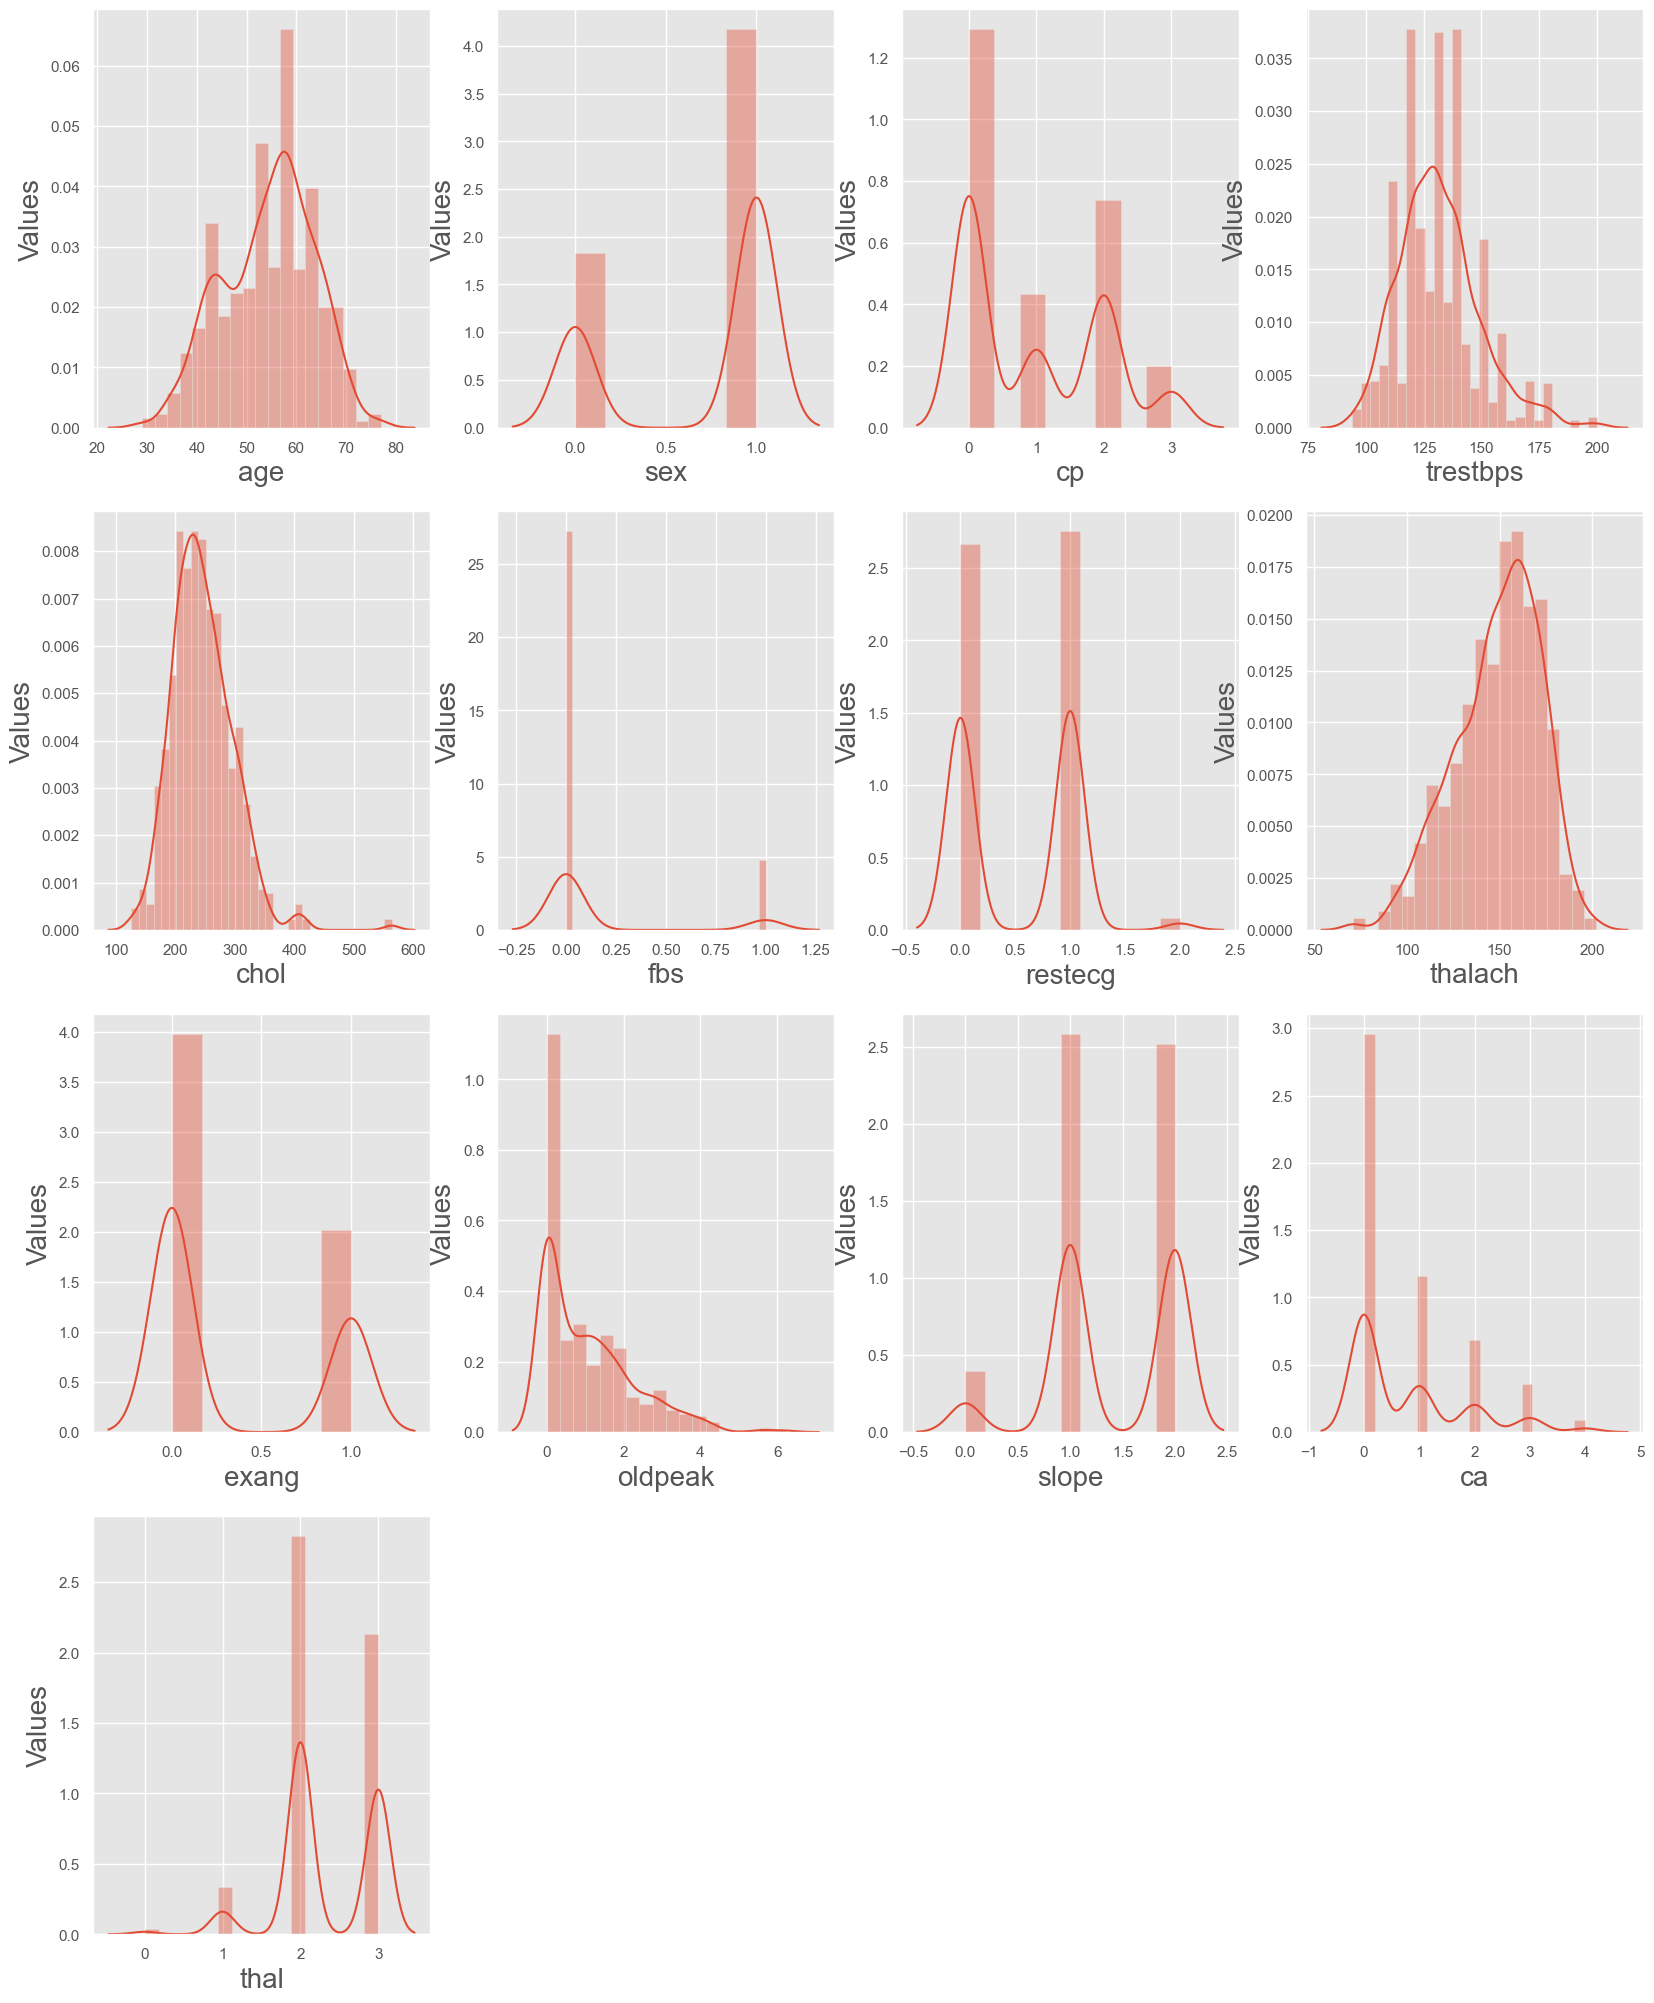

In [10]:

plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

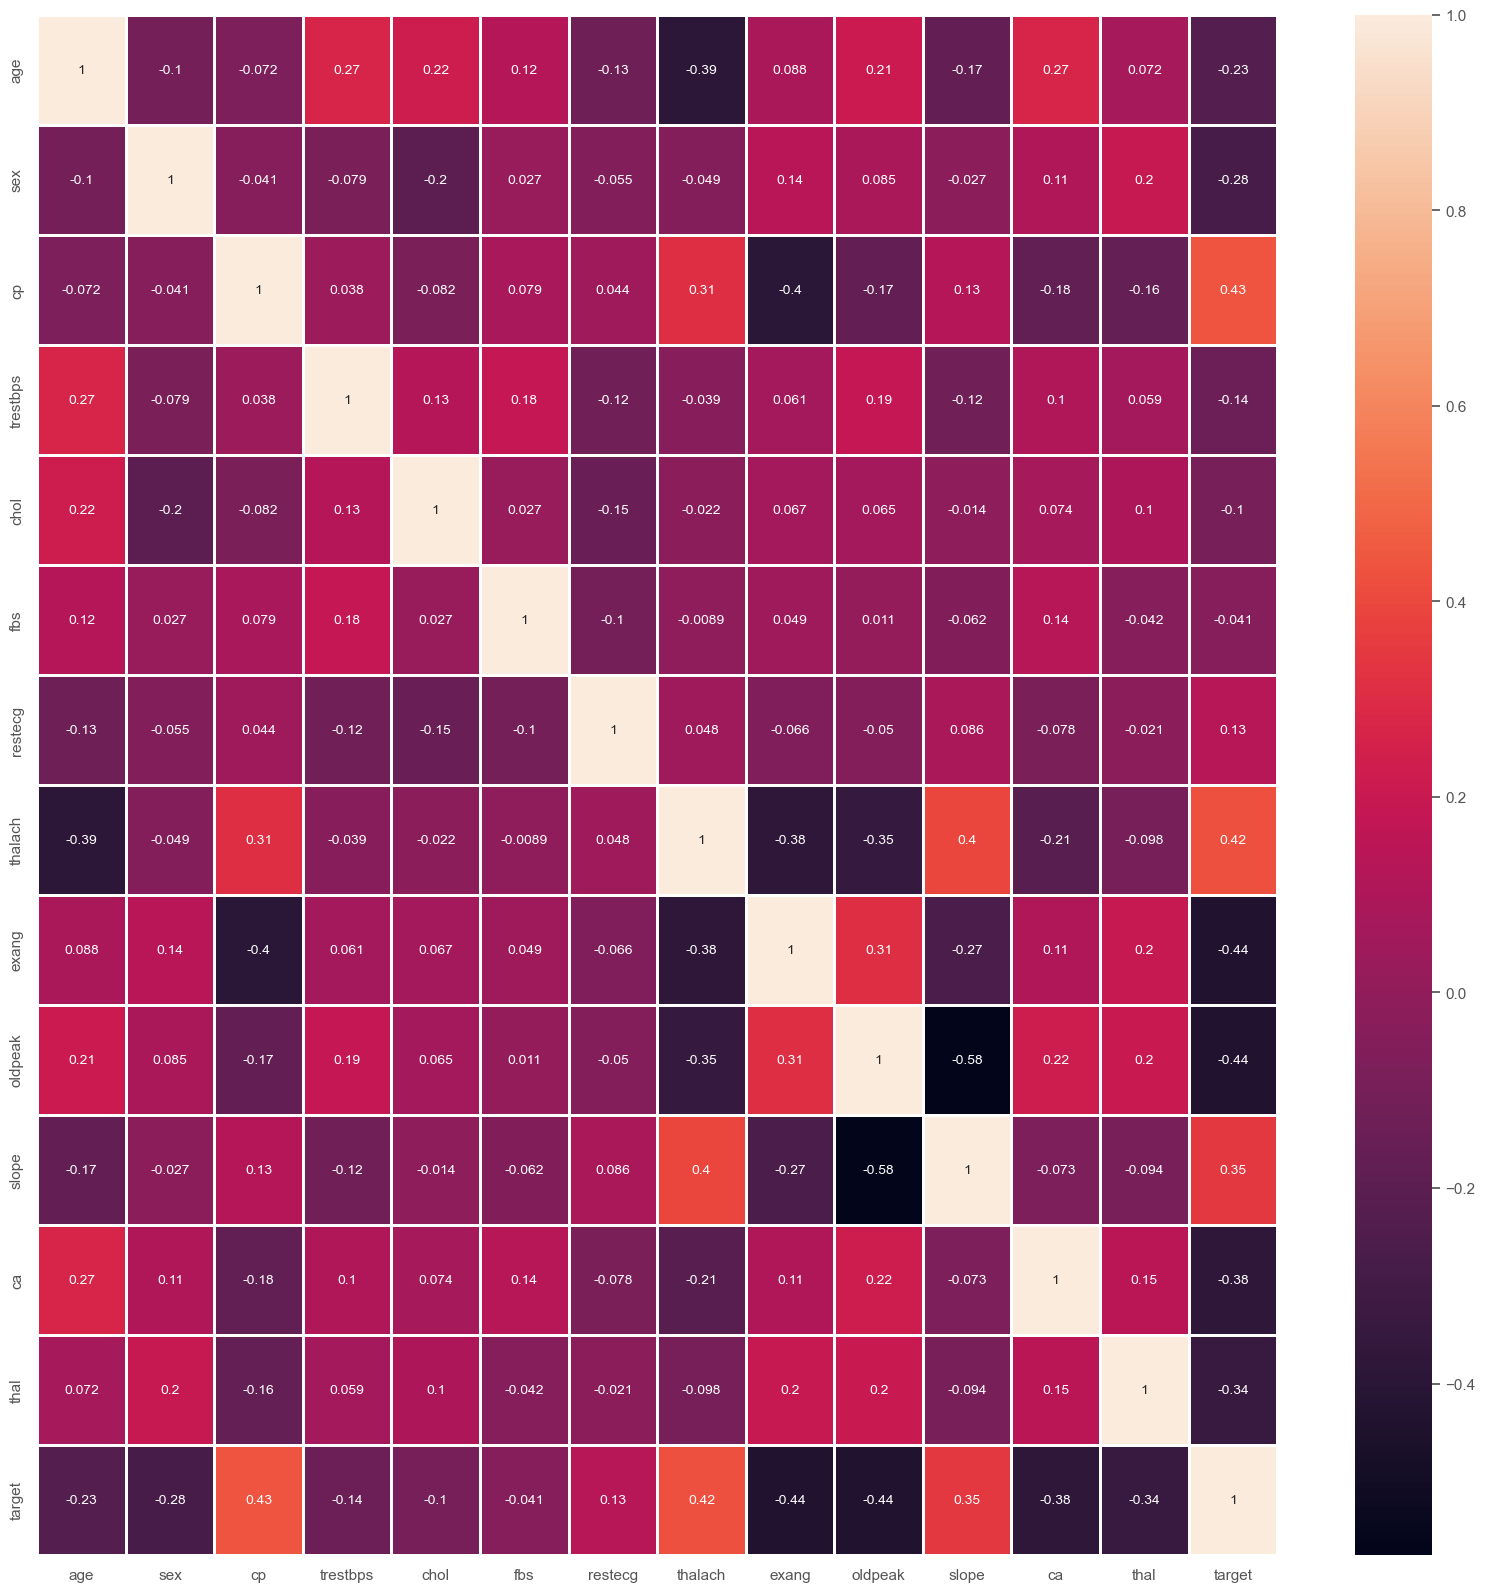

In [11]:
plt.figure(figsize = (20, 20))

corr = heart_df.corr()
#mask = np.triu(np.ones_like(corr, dtype = bool))
#sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
sns.heatmap(corr, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [12]:
#checking the variance
heart_df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

# Normalization

In [13]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
dtype: float64

In [14]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [16]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# spliting the dataset

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size=0.30, random_state=42)

# Model Building

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)


print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 98.05194805194806 %


In [21]:

print("Confusion matrix of the model \n",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model 
 [[150   0]
 [  6 152]]
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [25]:
cf_matrix=classification_report(y_test,y_pred)

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)

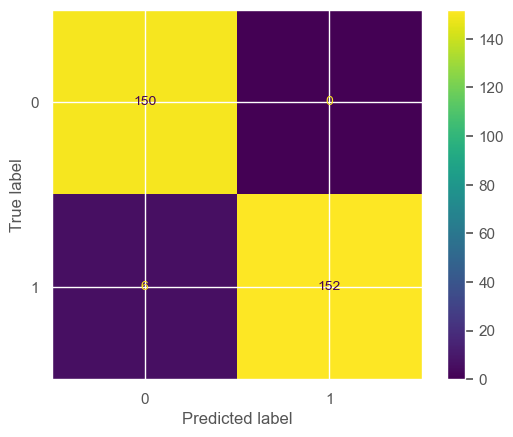

In [30]:
disp.plot()
plt.show()

In [31]:
dtc.feature_importances_

array([0.11654082, 0.03572275, 0.28783627, 0.03761487, 0.09654154,
       0.00918756, 0.00418704, 0.06077466, 0.02620793, 0.08274004,
       0.01378135, 0.1553044 , 0.07356077])

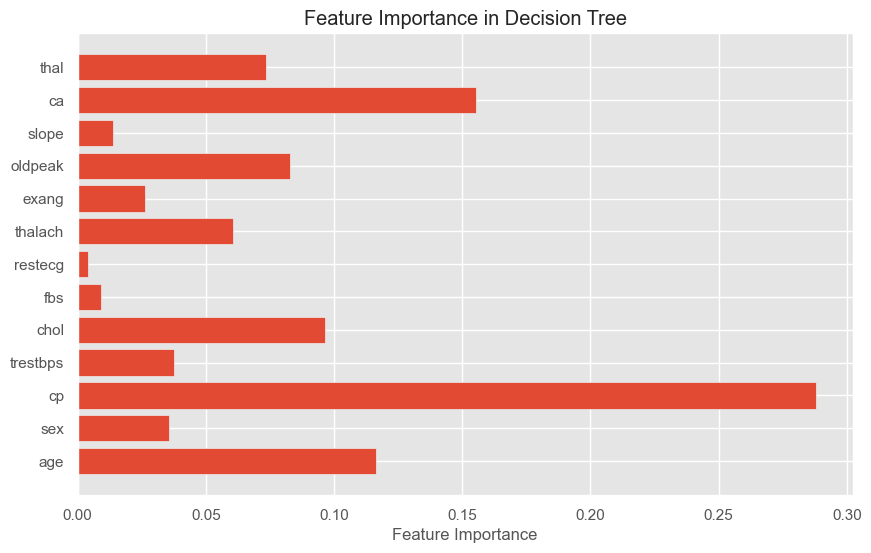

In [32]:
feature_importances = dtc.feature_importances_

# Get the names of the features (you should replace this with your feature names)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

# Prediction 

In [35]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtc.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


# Pickling the model

In [37]:
filename = 'heart_model.sav'
pickle.dump(dtc, open(filename, 'wb'))

In [39]:
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))